# Task 0 (pen & paper)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = tf.keras.Sequential([])
N = 10 # Number of feature maps
w, h = 5, 5 # Conv. window size

model.add(Conv2D(N, (w, h),
    input_shape=(64, 64, 3),
    activation = 'relu',
    padding = 'same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(N, (w, h),
    activation = 'relu',
    padding = 'same'))

model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(2, activation = 'sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 5122      
Total params: 8,392
Trainable params: 8,392
Non-trainable params: 0
______________________________________________________

In [3]:
n_conv1 = ((5*5*3)*10) + 10
n_conv2 = ((5*5*10)*10) + 10
n_dense = ((1*1*2560)*2) + 2

print(n_conv1, 0, n_conv2, 0, 0, n_dense)

760 0 2510 0 0 5122


In [77]:
model = tf.keras.Sequential([])
N = 32 # Number of feature maps
w, h = 5, 5 # Conv. window size

model.add(Conv2D(N, (w, h),
    input_shape=(64, 64, 3),
    activation = 'relu',
    padding = 'same'))

model.add(MaxPool2D(pool_size=(4, 4)))

model.add(Conv2D(N, (w, h),
    activation = 'relu',
    padding = 'same'))

model.add(MaxPool2D((4,4)))

model.add(Flatten())

model.add(Dense(100, activation = 'sigmoid')) # new dense layer

model.add(Dense(2, activation = 'sigmoid'))

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

# Task 2

In [79]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 24 08:48:51 2019

@author: hehu
"""

import glob
import numpy as np
import os
import matplotlib.pyplot as plt
#from simplelbp import local_binary_pattern

def load_data(folder):
    """ 
    Load all images from subdirectories of
    'folder'. The subdirectory name indicates
    the class.
    """
    
    X = []          # Images go here
    y = []          # Class labels go here
    classes = []    # All class names go here
    
    subdirectories = glob.glob(folder + "/*")
    
    # Loop over all folders
    for d in subdirectories:
        
        # Find all files from this folder
        files = glob.glob(d + os.sep + "*.jpg")
        
        # Load all files
        for name in files:
            
            # Load image and parse class name
            img = plt.imread(name)
            class_name = name.split(os.sep)[-2]

            # Convert class names to integer indices:
            if class_name not in classes:
                classes.append(class_name)
            
            class_idx = classes.index(class_name)
            
            X.append(img)
            y.append(class_idx)
    
    # Convert python lists to contiguous numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Test our loader

X, y = load_data("Ex3_data/GTSRB_subset")
print("X shape: " + str(X.shape))
print("y shape: " + str(y.shape))
# Continue your code here...

X shape: (202, 64, 64)
y shape: (202,)


In [80]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import os

X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = np.tile(X_train, [1, 1, 1, 3])
X_test = np.tile(X_test, [1, 1, 1, 3])

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [81]:
X_train.shape, y_train.shape

((141, 64, 64, 3), (141, 2))

In [82]:
# Training code:
import tensorflow as tf
from tensorflow.keras import optimizers

# The code is compiled to CUDA or C++
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 2,  validation_data = [X_test, y_test]) # takes a few seconds

Train on 141 samples, validate on 61 samples
Epoch 1/20
141/141 [==============================] - 1s 10ms/sample - loss: 0.6988 - acc: 0.5674 - val_loss: 0.6355 - val_acc: 0.6557
Epoch 2/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.5440 - acc: 0.7660 - val_loss: 0.4646 - val_acc: 0.7705
Epoch 3/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.4537 - acc: 0.8298 - val_loss: 0.3757 - val_acc: 0.8689
Epoch 4/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.2861 - acc: 0.8440 - val_loss: 0.1598 - val_acc: 0.9344
Epoch 5/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.1267 - acc: 0.9504 - val_loss: 0.0946 - val_acc: 0.9836
Epoch 6/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.0874 - acc: 0.9858 - val_loss: 0.0614 - val_acc: 0.9836
Epoch 7/20
141/141 [==============================] - 0s 3ms/sample - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0367 - val_acc: 0.9836
Epoch 8/20
141/1

# Task 3 

In [155]:
w = np.array([[0.0], [0.0]])
def log_loss(w, X, y):
    """ 
    Computes the log-loss function at w. The 
    computation uses the data in X with
    corresponding labels in y. 
    """

    # Accumulate loss terms here.

    # TODO: Sum up the loss for each sample in X to L
    
    # [N, 1]
    loss = np.log(1 + np.exp(-y * X.dot(w)))
    
    # [1]
    L = np.sum(loss)

    return L

log_loss(w, X, y)

277.2588722239781

In [161]:
def grad(w, X, y):
    """ 
    Computes the gradient of the log-loss function
    at w. The computation uses the data in X with
    corresponding labels in y. 
    """

    # Accumulate gradient here.

    # TODO: Sum up the gradient for each sample in X to G
    
    # [N, 2]
    g = -y*X / (1 + np.exp(-y * X.dot(w))) * np.exp(-y * X.dot(w))
    G = np.sum(g, axis = 0) / len(X)

    return G

grad(w, X, y)

array([ 0.27485926, -1.04426743])

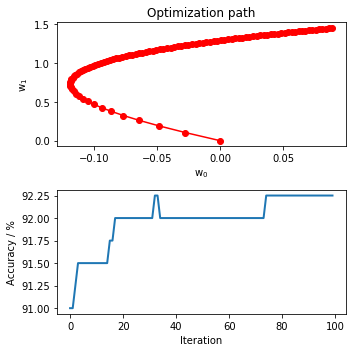

In [237]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def log_loss(w, X, y):
    """ 
    Computes the log-loss function at w. The 
    computation uses the data in X with
    corresponding labels in y. 
    """


    # Accumulate loss terms here.

    # TODO: Sum up the loss for each sample in X to L
    
    # [N, 1]
    loss = np.log(1 + np.exp(-y * X.dot(w)))
    
    # [1]
    L = np.sum(loss)

    return L


def grad(w, X, y):
    """ 
    Computes the gradient of the log-loss function
    at w. The computation uses the data in X with
    corresponding labels in y. 
    """

    # Accumulate gradient here.

    # TODO: Sum up the gradient for each sample in X to G
    
    # [N, 2]
    g = -y*X / (1 + np.exp(-y * X.dot(w))) * np.exp(-y * X.dot(w))
    G = np.sum(g, axis = 0) / len(X)
    G = G.reshape([2, 1])

    return G


if __name__ == "__main__":

    # TODO: Add your code here:

    # 1) Load X and y data:
    import csv

    with open('Ex4_data/X.csv', newline='') as csvfile:
        X = np.array(list(csv.reader(csvfile))).astype(float)
    
    with open('Ex4_data/y.csv', newline='') as csvfile:
        y = np.array(list(csv.reader(csvfile))).astype(float)

    # 2) Initialize w at random:
    w = np.array([[0.], [0.]])
    
    w_array = [w]

    # 3) Set step_size to a small positive value
    
    step_size = 0.1

    # 4) Initialize empty lists for storing the path and
    # accuracies:
    
    path = []
    accuracy_list = []
    y_10 = np.array(y)
    y_10[y_10 == -1] = 0
    
    y = y.reshape(-1, 1)

    for iteration in range(100):
    
        
        # 5) Apply the gradient descent rule:
        g = grad(w_array[iteration], X, y)
        w = w_array[iteration] - g * step_size
        w_array.append(w)
        # 6) Print the current state:
        # 7) Compute the accuracy:
        
        y_pred = 1 / (1 + np.exp(-X.dot(w)))
        
        acc = accuracy_score(np.round(y_pred), y_10)
        accuracy_list.append(acc)
        
    # 8) Below is a template for plotting. Feel free to
    # rewrite if you prefer different style:
    w_array = np.array(w_array)
    accuracy_list = np.array(accuracy_list)
    
    plt.figure(figsize=[5, 5])
    plt.subplot(211)
    plt.plot(w_array[:, 0], w_array[:, 1], 'ro-')
    plt.xlabel('w$_0$')
    plt.ylabel('w$_1$')
    plt.title('Optimization path')

    plt.subplot(212)
    plt.plot(100.0 * np.array(accuracy_list), linewidth=2)
    plt.ylabel('Accuracy / %')
    plt.xlabel('Iteration')
    plt.tight_layout()
    plt.savefig("log_loss_minimization.pdf", bbox_inches="tight")

(400, 1) (400, 2) (2, 1)
(1001, 2, 1)


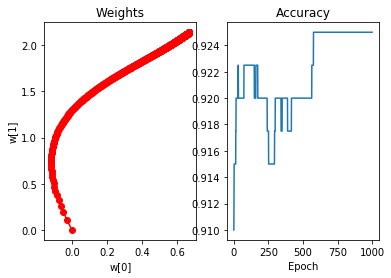

In [211]:

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

from numpy.random import seed
seed(1)
import tensorflow as tf
tf.compat.v1.random.set_random_seed(1)


def third():
    X = np.loadtxt('Ex4_data/X.csv', delimiter = ",").astype(np.float32)
    y = np.loadtxt('Ex4_data/y.csv', delimiter = ",").astype(np.float32)
    y_one_zero = np.array(y)
    y_one_zero[y_one_zero == -1] = 0
    y = y.reshape(-1, 1)
    w = np.array([[0], [0]]).astype(np.float32)
    learning_rate = 0.1
    C = 1
    weight_history = [w]
    acc_history    = []
    N = X.shape[0]

    # (N, 1) (N, 2) (N, 1)
    print(y.shape, X.shape, w.shape)

    for i in range(1000):

        ## forward 
        # (N, 1) = (N, 2) x (2, 1)
        Xw = X.dot(w)
        # (N, 1)
        yXw = y * Xw
        # (N, 1)
        exp_yXw = np.exp(-yXw)
        # (N, 1)
        one_exp_yXw = 1 + exp_yXw
        # (N, 1)
        log_1_exp_yXw = np.log(one_exp_yXw)
        # log_1_exp_yXw = np.log(one_exp_yXw) + C * w.T.dot(w)
        # (1, 1)
        loss = np.sum(log_1_exp_yXw) 
        
        ## backward 
        # (N, 2) = (N, 1) * (N, 2)
        y_X = y * X
        # (N, 2) = (N, 2) / (N, 1) * (N, 1)
        y_X_over_one_exp_yXw = (-y_X / one_exp_yXw) * exp_yXw
        # (2, 1)
        w_grad = np.sum(y_X_over_one_exp_yXw, axis=0).reshape(-1, 1) / N
        # w_grad = (np.sum(y_X_over_one_exp_yXw, axis=0).reshape(-1, 1) + 2 * C * w) / N
        # print(f'grad: {w_grad.ravel()}')

        ##  update weights
        w = w - learning_rate * w_grad

        ## history
        weight_history.append(w)

        ## prediction
        # (N, 1) = (N, 2) x (2, 1)
        #y_pred = F.sigmoid(torch.tensor(X.dot(w))).numpy()
        y_pred = 1 / (1 + np.exp(-X.dot(w)))
        
        accuracy = accuracy_score(np.round(y_pred), y_one_zero)
        acc_history.append(accuracy)

    weight_history = np.array(weight_history)
    print(weight_history.shape)
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(weight_history[:, 0], weight_history[:, 1], 'ro-')    
    ax[0].set_title("Weights")
    ax[0].set_xlabel("w[0]")
    ax[0].set_ylabel("w[1]")
    
    ax[1].plot(acc_history)
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epoch")

    plt.show()


if __name__ == "__main__":
    third()